<a href="https://colab.research.google.com/github/EmilisGit/Deep_learning/blob/main/Telecom_churn_classification_code_adaptation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQk4anYFFsY3OTqb6RP4oTBhqPM0P1u80tSRA&usqp=CAU" width=75 height=50>

#<font color='Dark Maroon'><b>The details of this Notebook are explained in this YouTube video Neural Network</b></font>
<center>

  <a href="https://www.youtube.com/watch?v=fkoHrIGxIpA" target="_blank">

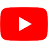

  </a>
</center>

*Algirdas Laukaitis*

##<font color='Dark Maroon'>AdventureWorks DW using TensorFlow <b>Decision Forests</b></font>


[AdventureWorks DW schema](https://github.com/aalgirdas/AdventureWorksDW/blob/main/AdventureWorksDW2008.png)

[AdventureWorks schema](https://github.com/aalgirdas/AdventureWorksDW/blob/main/AdventureWorks2008.png?raw=true)


<br><br>

---
#<font color='	Dark Maroon'>Step 1. From a csv data file that is available online to 2 DataFrame tables:  training and test</font>



## 1.1 Let’s load the vTargetMail.csv data into a dataframe from GitHub.

In [37]:
import pandas as pd
df = pd.read_csv('Telecom Customers Churn.csv', sep=',')
print("The dataframe has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

The dataframe has 7043 rows and 21 columns.


## 1.2 Next, we will examine the first row of the data to determine which information is relevant to our task.

In [39]:
print(df.iloc[0]) # The first row of the DataFrame df.

customerID                7590-VHVEG
gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                             No
Name: 0, dtype: object


## 1.3 We remove attributes that we don’t require
> *And we rename some attributes because we want to reuse the code snippets from official TensorFlow tutorials. Renaming an attribute is much easier than rewriting code.*

In [40]:
df.drop(columns = ["customerID", "OnlineSecurity", "OnlineBackup", "TechSupport"], inplace=True)
df.rename(columns = {'Churn':'target'}, inplace = True)
print(df.iloc[0])



gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
DeviceProtection                  No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
target                            No
Name: 0, dtype: object


## 1.4 Split the DataFrame into training and test sets

When we teach a machine learning model, we want to make sure it can perform well on new data that it has not seen before. To do this, we typically divide our data into three sets: the training set, the validation set, and the test set.

The training set is used to teach the model how to make predictions. The validation set is used to fine-tune the model to make it work better and to avoid a problem called overfitting. Overfitting happens when the model is too closely trained on the training data and doesn't perform well on new data. (But for Decision Forests we don't need validation set) The test set is used to check how well the model performs on new data after it has been trained and fine-tuned.



In [41]:
import numpy as np

train, test = np.split(df.sample(frac=1), [ int(0.9*len(df))])  # The dataset is in a single pandas DataFrame. Split it into training, and test sets using a, for example, 90:10 ratio, respectively.
print(len(train), 'training examples')
print(len(test), 'test examples')

print(test.iloc[0])

6338 training examples
705 test examples
gender                                   Male
SeniorCitizen                               0
Partner                                    No
Dependents                                 No
tenure                                     56
PhoneService                              Yes
MultipleLines                             Yes
InternetService                            No
DeviceProtection          No internet service
StreamingTV               No internet service
StreamingMovies           No internet service
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          25.95
TotalCharges                          1444.05
target                                     No
Name: 3109, dtype: object


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.


<br><br>

---


#<font color='	Dark Maroon'>Step 2. From DataFrame table to TensorFlow dataset data</font>

## Import TensorFlow and other libraries

In [42]:
%%capture
!pip install tensorflow_decision_forests==1.4.0
#!pip install tensorflow_decision_forests

In [43]:
import tensorflow_decision_forests as tfdf

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train, label='target')
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, label='target')


<br><br>

---


#<font color='	Dark Maroon'>Step 3. Model</font>

In [44]:
model_1 = tfdf.keras.RandomForestModel(num_trees=100 , max_depth=15 ) # num_trees=100 , max_depth=15 , verbose=0

Use /tmp/tmpvhscavqo as temporary training directory


<br><br>

---


#<font color='Dark Maroon'>Step 4. Train and evaluate the model</font>

<br>

##<font color='Dark Maroon'>Train 🏃‍♂️</font>

In [45]:
model_1.fit(train_ds)

Reading training dataset...
Training dataset read in 0:00:01.032117. Found 6338 examples.
Training model...
Model trained in 0:00:02.454770
Compiling model...
Model compiled.


<br>


##<font color='Dark Maroon'>Evaluate ⚖️</font>

In [46]:
model_1.compile(metrics=['accuracy'])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print(f'{evaluation["accuracy"]:.4f}')



1/1 [==============================] - 0s 397ms/step - loss: 0.0000e+00 - accuracy: 0.7716
0.7716


<br>


##<font color='Dark Maroon'>Plotting the training logs 🧾</font>

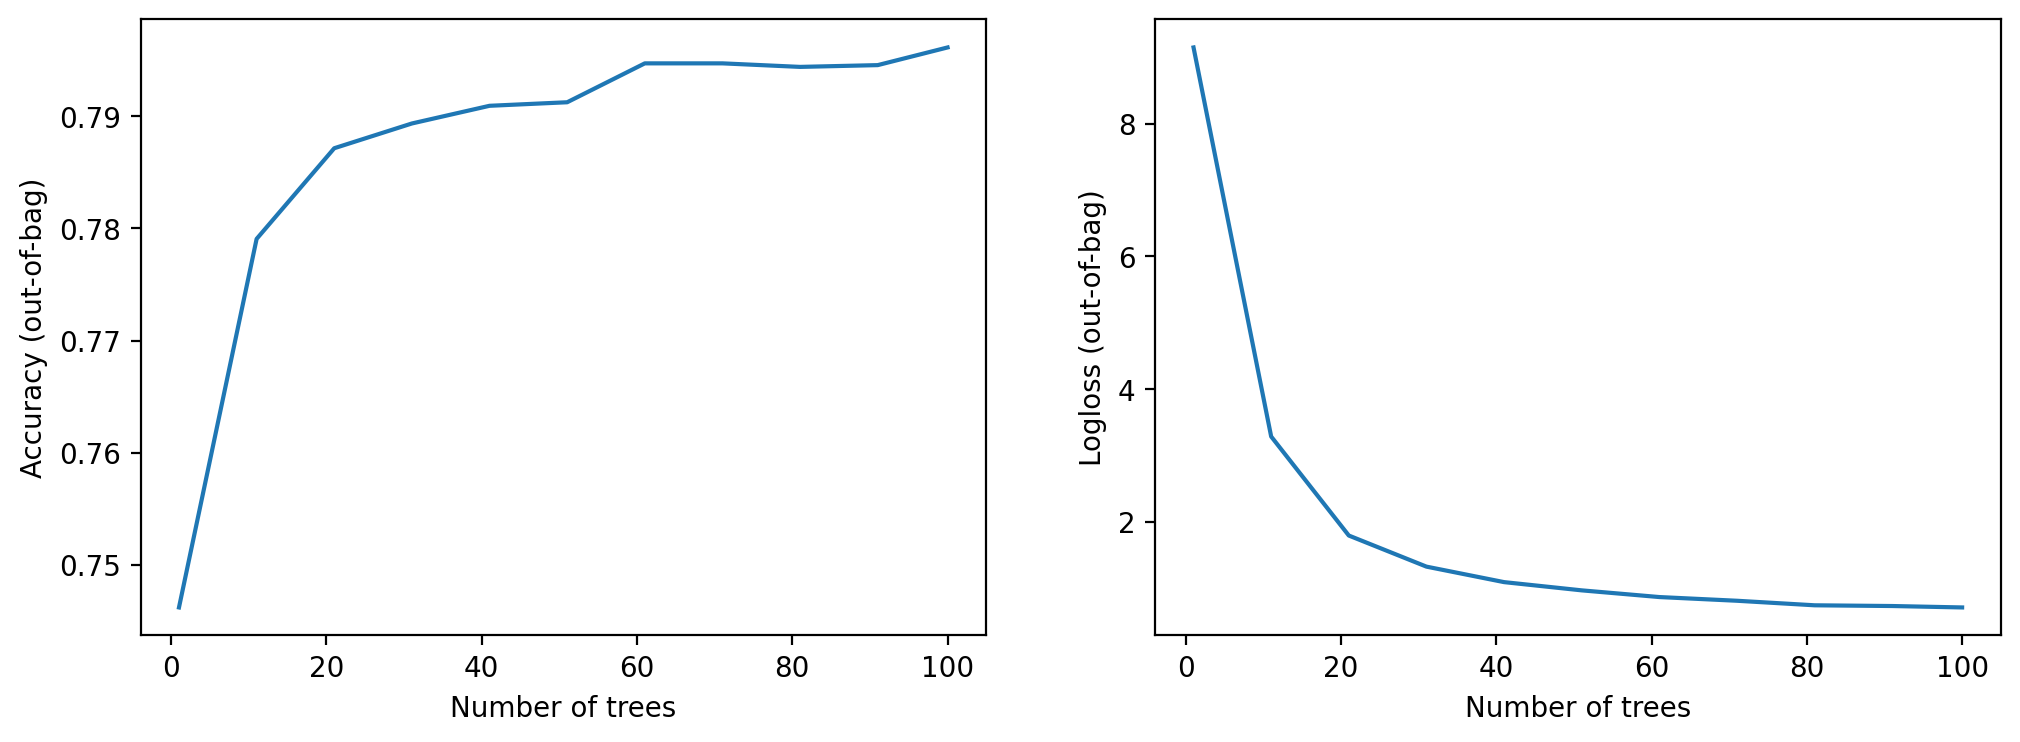

In [47]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

<br>




##<font color='Dark Maroon'>Let's choose one tree 🌲 from the forest (tree_idx=...) and plot the model</font>

In [48]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=15) ## The decision tree number is defined by the tree_idx=... parameter


<br><br>

---


#<font color='Dark Maroon'> Step 5. Perform inference 🛠</font>

##<font color='Dark Maroon'> Save 💾 </font>

In [49]:
model_1.save('Telecom_Churn_RandomForestModel_trees300')

##<font color='Dark Maroon'> Load ⚙️</font>

In [50]:
import tensorflow as tf
reloaded_model = tf.keras.models.load_model('Telecom_Churn_RandomForestModel_trees300')

##<font color='Dark Maroon'> New data  🗃️</font>

In [51]:
# target should be Yes
sample = {
    "gender" : "Female",
    "SeniorCitizen" : 0,
    "Partner" : "No",
    "Dependents" :"No",
    "tenure" : 1,
    "PhoneService" :"Yes",
    "MultipleLines" : "No",
    "InternetService" : "DSL",
    "DeviceProtection" : "No",
    "StreamingTV" : "No",
    "StreamingMovies" : "No",
    "Contract" : "Month-to-month",
    "PaperlessBilling" : "Yes",
    "PaymentMethod" : "Electronic check",
    "MonthlyCharges" : 50.8,
    "TotalCharges" : 50.8,
}


##<font color='Dark Maroon'> Predict  🔮</font>

In [52]:
new_observation_df = pd.DataFrame([sample])
new_observation_ds = tfdf.keras.pd_dataframe_to_tf_dataset(new_observation_df)
predictions = model_1.predict(new_observation_ds)
print(predictions)

1/1 [==============================] - 2s 2s/step
[[0.8399995]]


In [53]:
#predictions = reloaded_model.predict(test_ds)


<br><br><br><br>

---
---

#<font color='Dark Maroon'> Visualizing TensorFlow Decision Forest Trees with dtreeviz
</font>

In [54]:
%%capture
!pip install -q -U dtreeviz

In [55]:
import dtreeviz

from matplotlib import pyplot as plt
from IPython import display

# avoid "Arial font not found warnings"
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

display.set_matplotlib_formats('retina') # generate hires plots

<ipython-input-55-3c53b8155882>:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


## Display decision tree

In [63]:
AdventDW_features = [f.name for f in model_1.make_inspector().features()]
viz_cmodel = dtreeviz.model(model_1,
                           tree_index=0,
                           X_train=train[AdventDW_features],
                           y_train=train['target'],
                           feature_names=AdventDW_features,
                           target_name='target',
                           class_names=['No','Yes'])
print(train[AdventDW_features])

            Contract Dependents     DeviceProtection InternetService  \
4951  Month-to-month         No                   No     Fiber optic   
1461  Month-to-month         No                   No     Fiber optic   
2041        Two year         No  No internet service              No   
1489        One year        Yes                   No             DSL   
4186        Two year        Yes                  Yes     Fiber optic   
...              ...        ...                  ...             ...   
6877  Month-to-month         No                   No     Fiber optic   
1092        Two year         No                  Yes             DSL   
1527        Two year        Yes  No internet service              No   
4935        One year         No  No internet service              No   
1456  Month-to-month         No                   No     Fiber optic   

      MonthlyCharges MultipleLines PaperlessBilling Partner  \
4951           84.30           Yes              Yes     Yes   
1461     

In [61]:
viz_cmodel.view()

TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:
x = train[AdventDW_features].iloc[20]
viz_cmodel.view(x=x, scale=.75)